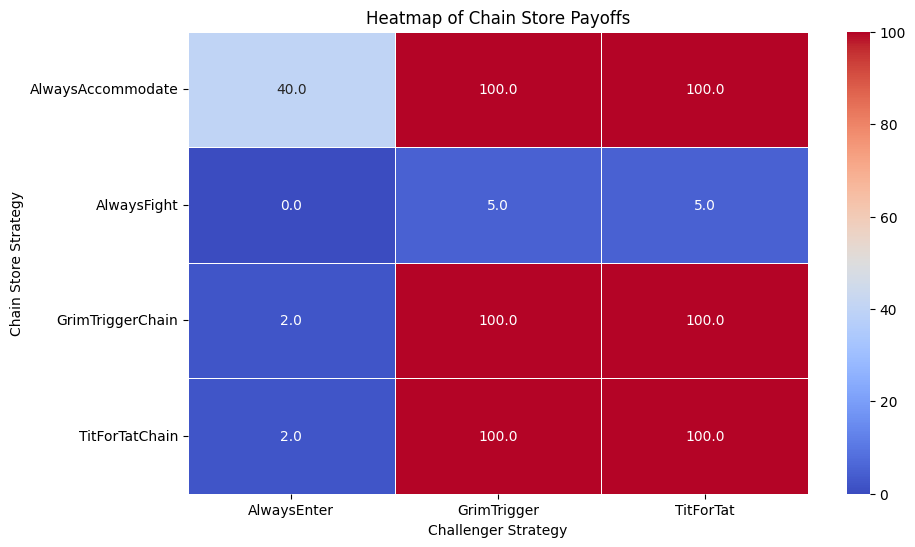

,Chain Strategy,Challenger Strategy,Chain Payoff,Challenger Payoff
0,AlwaysAccommodate,AlwaysEnter,40,40
1,AlwaysAccommodate,TitForTat,100,20
2,AlwaysAccommodate,GrimTrigger,100,20
3,AlwaysFight,AlwaysEnter,0,0
4,AlwaysFight,TitForTat,5,1
5,AlwaysFight,GrimTrigger,5,1
6,TitForTatChain,AlwaysEnter,2,2
7,TitForTatChain,TitForTat,100,20
8,TitForTatChain,GrimTrigger,100,20
9,GrimTriggerChain,AlwaysEnter,2,2


In [134]:
# Re-import necessary libraries since execution state was reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define payoffs
monopoly_profit = 5      # Chain's payoff if no entry (competitor stays out)
duopoly_profit = 2       # Chain's payoff if it accommodates an entrant
fight_profit = 0         # Chain's payoff if it fights
safe_payoff = 1          # Challenger's payoff if staying out
entry_payoff = 2         # Challenger's payoff if entering and being accommodated
fight_loss = 0           # Challenger's payoff if entering and being fought


# Define challenger strategies
class AlwaysEnter:
    def move(self, _):
        return "Enter"  


class TitForTat:
    def move(self, last_move_chain):
        if last_move_chain is None:
            return "Stay Out"
        if last_move_chain == "Fight":
            return "Enter"
        else:
            return "Stay Out"

class GrimTrigger:
    def __init__(self):
        self.triggered = False  

    def move(self, last_move_chain):
        if self.triggered:
            return "Enter"
        if last_move_chain is None:
            return "Stay Out"
        if last_move_chain == "Fight":
            self.triggered = True
            return "Enter"
        return "Stay Out"

# Define chain store strategies
class AlwaysAccommodate:
    def move(self, _):
        return "Accommodate"

class AlwaysFight:
    def move(self, _):
        return "Fight"

class TitForTatChain:
    def move(self, last_move_challenger):
        if last_move_challenger is None:
            return "Accommodate"
        if last_move_challenger == "Enter":
            return "Fight"
        else:
            return "Accommodate"
 
class GrimTriggerChain:
    def __init__(self):
        self.triggered = False  

    def move(self, last_move_challenger):
        if self.triggered:
            return "Fight"
        if last_move_chain is None:
            return "Accommodate"
        if last_move_challenger == "Enter":
            self.triggered = True
            return "Fight"
        return "Accommodate"
    

# Simulation function
def simulate(chain_strategy, challenger_strategy, rounds=20):
    chain_payoff, challenger_payoff = 0, 0
    last_move_chain, last_move_challenger = None, None
    
    chain = chain_strategy()
    challenger = challenger_strategy()
    
    for _ in range(rounds):
        challenger_decision = challenger.move(last_move_chain)  
        chain_decision = chain.move(last_move_challenger) 

        if challenger_decision == "Stay Out":
            chain_payoff += monopoly_profit
            challenger_payoff += safe_payoff
        else:  
            if chain_decision == "Fight":
                chain_payoff += fight_profit
                challenger_payoff += fight_loss
            else:  
                chain_payoff += duopoly_profit
                challenger_payoff += entry_payoff

        last_move_chain = chain_decision  
        last_move_challenger = challenger_decision 
    
    return chain_payoff, challenger_payoff

# Running simulations with different strategies
strategies_chain = [AlwaysAccommodate, AlwaysFight, TitForTatChain, GrimTriggerChain]
strategies_challenger = [AlwaysEnter, TitForTat, GrimTrigger]

results = []
for chain_strategy in strategies_chain:
    for challenger_strategy in strategies_challenger:
        chain_score, challenger_score = simulate(chain_strategy, challenger_strategy)
        results.append({
            "Chain Strategy": chain_strategy.__name__,
            "Challenger Strategy": challenger_strategy.__name__,
            "Chain Payoff": chain_score,
            "Challenger Payoff": challenger_score
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

results_df

heatmap_data = results_df.pivot(index="Chain Strategy", columns="Challenger Strategy", values="Chain Payoff")

# Visualization with Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Chain Store Payoffs")
plt.xlabel("Challenger Strategy")
plt.ylabel("Chain Store Strategy")
plt.show()

results_df

